In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip show pillow

In [3]:
#!pip install pillow
#!pip install nvidia-ml-py3

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
import mlcrate as mlc
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Since the experiment tracking in MODEL3 was all over the place, we need a better system to track and evaluate our experiments. That's what this notebook is for.

# cyclical batch sizes similar to cyclical learning rates? experiment.

### Experiment Tracker:
- [X] From MODEL3 we already know that resnet50 is doing better than resnet34. Let's use that information and experiment with other paramets. After all other experiments are done, we could try the resnet 34 vs resnet 50 thing again. But, for now, consider it shelved.

### So, with resnet-50 as our model:
- [X] Try batch size 16, 32, 64, 128. Batch size influences what is the size of the batch loaded onto the GPUs in one iteration. See if this changes execution speed at all. Size set as 300.
- [X] Try image sizes 112, 168, 224, 280, 336, 392, 450, 500, 550. These are all square sizes.
- [X] Try non square image sizes (320,50), (300,100), (240,400), (300,250).
- [ ] Try different available image color maps.
- [ ] Try using different Transforms.
- [ ] Are Data Augmentations and Transforms entirely different things? From the names, it does seem like it.
- [ ] If yes to the above, try data augmentation too.
- [ ] Try Normalization.
- [X] Figure out why there are only 97 classes and not 100. Find out which ones are missing.
- [ ] Try all the models mentioned here: https://docs.fast.ai/vision.models.html. Train and tune them separately, apart from resnet34 and resnet50.
- [ ] Try training on grayscale.
- [ ] PNG is better than JPEG. JPEG loses the alpha format. Try different file format.
- [ ] Consolidate experiment results.
- [ ] Regularization
- [ ] Dropout
- [ ] Weight Decay
- [ ] Train a n/w with the best parameters for all of these.
- [ ] Finetune and unfreeze post above.

In [8]:
def transform_trials():
    pass

In [9]:
def data_aug_trials():
    pass

In [11]:
def normalization_trials():
    pass

# Hypothesis for Batch Size:
1. Smaller batch size should take lesser time to train.
2. At some point the GPU should run out of memory with bigger batch sizes.

In [5]:
def batch_size_trials(batch_size):
    data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = 300, valid_pct= 0.15, seed = 42, bs = batch_size)
    path = Path('~./Anime_Project/data_v4/Anime_Recogntn_Images')
    
    classes = data.classes
    for c in classes:
        #print(c)
        verify_images(path/c, delete=True, size = 500)
    
    learn = cnn_learner(data, models.resnet50, metrics = error_rate)
    
    print("Train Cycle 1")
    learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))
    learn.recorder.plot_losses()    
    
    learn.save('stage-1-50-data_v3_batch_size_trials_' + str(batch_size))

Train Cycle 1


epoch,train_loss,valid_loss,error_rate,time
0,2.721392,2.157578,0.528107,02:29
1,2.697980,2.114336,0.533284,02:08
2,2.215180,1.860322,0.466716,02:10
3,1.906785,1.697221,0.405325,02:08
4,1.628983,1.307795,0.329882,02:07
5,1.073573,1.339311,0.299556,02:09
6,0.729018,1.133219,0.280325,02:07
7,0.553421,1.117017,0.272189,02:12


Time taken: 1062.9341914653778


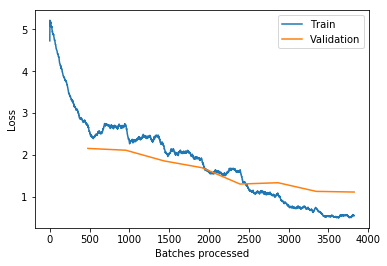

In [6]:
time = mlc.time.Timer()
batch_size_trials(16)
print("Time taken: {}".format(time.since(0)))

Train Cycle 1


epoch,train_loss,valid_loss,error_rate,time
0,2.738515,1.953470,0.485947,01:47
1,2.453760,1.963122,0.482988,01:50
2,2.027432,1.764745,0.456361,01:54
3,1.546801,1.447124,0.359467,01:51
4,1.126433,1.286384,0.320266,01:52
5,0.773724,1.153679,0.285503,01:52
6,0.382857,1.145605,0.265533,01:49
7,0.264156,1.137778,0.269970,01:51


Time taken: 892.0150067806244


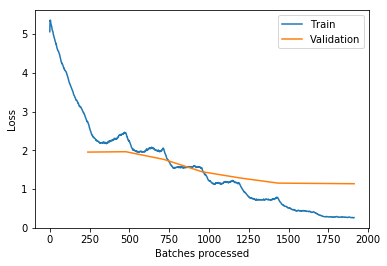

In [7]:
time = mlc.time.Timer()
batch_size_trials(32)
print("Time taken: {}".format(time.since(0)))

Train Cycle 1


epoch,train_loss,valid_loss,error_rate,time
0,3.069172,2.036442,0.499260,01:44
1,2.162937,1.922920,0.480030,01:41
2,1.802900,1.742993,0.429734,01:40
3,1.281782,1.463319,0.356509,01:43
4,0.878411,1.308869,0.318787,01:41
5,0.533810,1.213745,0.292899,01:42
6,0.269995,1.163805,0.277367,01:41
7,0.174904,1.160784,0.275888,01:40


Time taken: 821.5907154083252


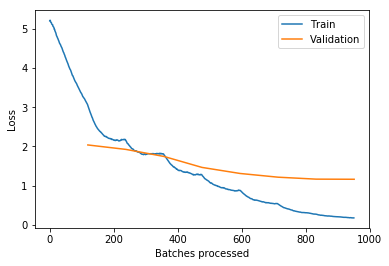

In [8]:
time = mlc.time.Timer()
batch_size_trials(64)
print("Time taken: {}".format(time.since(0)))

Train Cycle 1


epoch,train_loss,valid_loss,error_rate,time
0,3.272323,2.093031,0.517751,01:39
1,2.125304,1.909515,0.443047,01:40
2,1.736334,1.713092,0.402367,01:43
3,1.232684,1.433256,0.343935,01:41
4,0.811354,1.386625,0.331361,01:43
5,0.489176,1.239200,0.283284,01:39
6,0.270499,1.220348,0.269970,01:41
7,0.164383,1.214238,0.271450,01:42


Time taken: 816.5139801502228


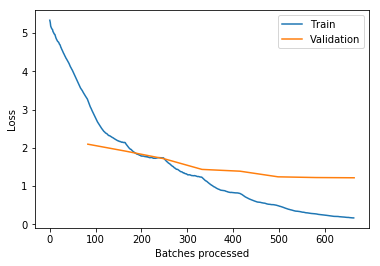

In [9]:
time = mlc.time.Timer()
batch_size_trials(92)
print("Time taken: {}".format(time.since(0)))

## Maybe run the above again with no other process running at the same time to figure out if there really is a relation with batch_size and time taken.

In [10]:
time = mlc.time.Timer()
batch_size_trials(128)
print("Time taken: {}".format(time.since(0)))

Train Cycle 1


epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 182.00 MiB (GPU 0; 15.90 GiB total capacity; 15.06 GiB already allocated; 113.88 MiB free; 70.10 MiB cached)

In [5]:
def image_size_trials(size_ip):
    data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = size_ip, valid_pct= 0.15, seed = 42, bs = 32)
    #print(data)
    path = Path('~./Anime_Project/data_v4/Anime_Recogntn_Images')
    
    classes = data.classes
    for c in classes:
        #print(c)
        verify_images(path/c, delete=True, size = 500)
    
    learn = cnn_learner(data, models.resnet50, metrics = error_rate)
    
    learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))
    print("Train Cycle 1")
    learn.recorder.plot_losses()
    
    learn.save('stage-1-50-data_v3_image_size_trials_' + str(size_ip))

## For the image size tests, we'll stick to batch size 32.

# Hypothesis for Image Size:
1. Accuracy should increase as the image size increases.
2. Might be interesting to see how time taken changes as image sizes increase.

epoch,train_loss,valid_loss,error_rate,time
0,3.596238,3.050689,0.718195,01:27
1,3.167772,2.733717,0.673077,01:28
2,2.704544,2.372264,0.571006,01:27
3,2.261946,2.137605,0.523669,01:27
4,1.780139,1.984385,0.472633,01:26
5,1.331650,1.877005,0.431953,01:29
6,0.876966,1.845275,0.426035,01:27
7,0.663384,1.865420,0.427515,01:29


Train Cycle 1
Time taken: 709.0600590705872


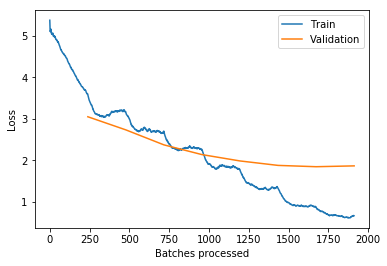

In [6]:
time = mlc.time.Timer()
image_size_trials(112)
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,3.121575,2.480829,0.595414,01:36
1,2.723030,2.452283,0.589497,01:32
2,2.294143,2.008514,0.494083,01:33
3,1.909751,1.842966,0.451923,01:33
4,1.541037,1.633972,0.407544,01:32
5,0.992103,1.536713,0.386834,01:34
6,0.591590,1.504130,0.366864,01:33
7,0.412983,1.490199,0.354290,01:34


Train Cycle 1
Time taken: 755.1413416862488


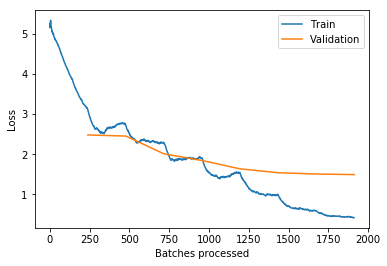

In [7]:
time = mlc.time.Timer()
image_size_trials(168)
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.887360,2.175136,0.538462,01:39
1,2.540290,2.164403,0.518491,01:38
2,2.105262,1.904587,0.481509,01:37
3,1.755299,1.574330,0.387574,01:38
4,1.306715,1.447276,0.356509,01:39
5,0.808402,1.370773,0.337278,01:41
6,0.466096,1.286677,0.309172,01:38
7,0.338500,1.284146,0.298817,01:40


Train Cycle 1
Time taken: 797.8466427326202


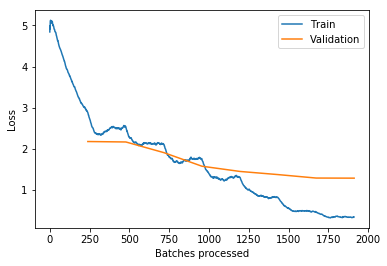

In [8]:
time = mlc.time.Timer()
image_size_trials(224)
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.768679,2.020320,0.480030,01:50
1,2.447505,2.143513,0.514053,01:47
2,1.992491,1.683427,0.426775,01:48
3,1.579883,1.488510,0.375000,01:45
4,1.173368,1.329167,0.346154,01:46
5,0.712562,1.168878,0.292899,01:47
6,0.399877,1.138473,0.276627,01:45
7,0.275814,1.138650,0.277367,01:44


Train Cycle 1
Time taken: 858.2811636924744


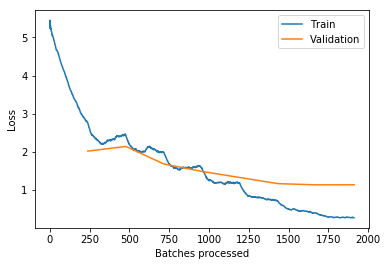

In [9]:
time = mlc.time.Timer()
image_size_trials(280)
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.719272,1.969071,0.485207,01:58
1,2.395266,2.067608,0.482988,01:51
2,1.961893,1.640539,0.403846,01:54
3,1.518360,1.419024,0.357988,01:55
4,1.137816,1.283329,0.306953,01:53
5,0.677149,1.165662,0.278846,02:03
6,0.365773,1.096537,0.257396,02:08
7,0.271910,1.108303,0.258136,01:56


Train Cycle 1
Time taken: 945.7916886806488


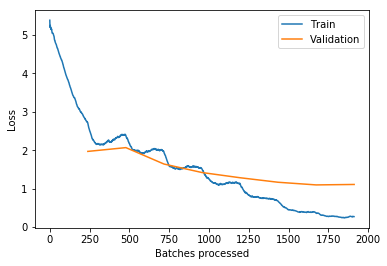

In [10]:
time = mlc.time.Timer()
image_size_trials(336)
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.716977,1.959754,0.480769,02:07
1,2.356454,1.920774,0.474112,01:58
2,1.931340,1.666600,0.425296,02:02
3,1.508195,1.434683,0.358728,01:59
4,1.165672,1.237427,0.318787,02:02
5,0.657812,1.093246,0.276627,02:00
6,0.361730,1.038430,0.253698,02:01
7,0.239048,1.022603,0.252959,01:59


Train Cycle 1
Time taken: 976.3184955120087


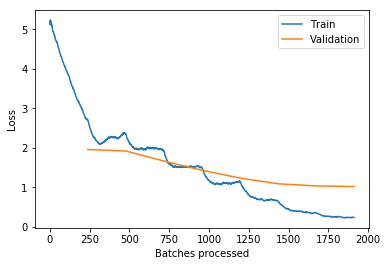

In [11]:
time = mlc.time.Timer()
image_size_trials(392)
print("Time taken: {}".format(time.since(0)))

### Passing tuples as arguments just take an extra ().

### Some standard image sizes:

epoch,train_loss,valid_loss,error_rate,time
0,4.113139,3.539489,0.817308,01:38
1,3.616680,3.376073,0.807692,01:36
2,3.267463,3.075243,0.743343,01:40
3,2.935462,2.836883,0.681213,01:38
4,2.535931,2.627807,0.641272,01:36
5,2.006322,2.570333,0.609467,01:36
6,1.423172,2.540424,0.598373,01:32
7,1.138873,2.560530,0.605030,01:34


Train Cycle 1
Time taken: 776.1863181591034


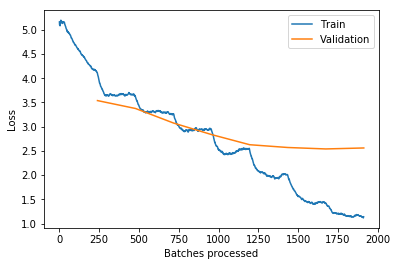

In [12]:
time = mlc.time.Timer()
image_size_trials((320,50))
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,3.586435,3.075459,0.730769,01:37
1,3.207973,2.757844,0.667160,01:36
2,2.637040,2.457247,0.596154,01:35
3,2.267990,2.164600,0.548817,01:32
4,1.775115,1.971580,0.500000,01:36
5,1.319637,1.839380,0.460799,01:34
6,0.811019,1.820046,0.437870,01:32
7,0.661473,1.802459,0.439349,01:34


Train Cycle 1
Time taken: 763.2275128364563


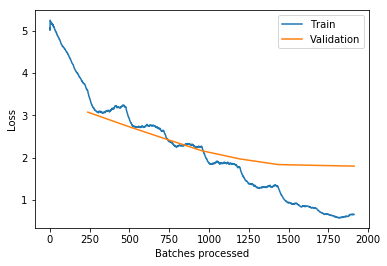

In [13]:
time = mlc.time.Timer()
image_size_trials((300,100))
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.842628,2.087030,0.511834,01:44
1,2.408159,1.881275,0.480769,01:42
2,1.992706,1.723424,0.452663,01:42
3,1.561322,1.425944,0.366124,01:45
4,1.251407,1.195913,0.305473,01:41
5,0.719395,1.122892,0.279586,01:41
6,0.416275,1.070253,0.255917,01:43
7,0.261596,1.064299,0.257396,01:43


Train Cycle 1
Time taken: 828.2749843597412


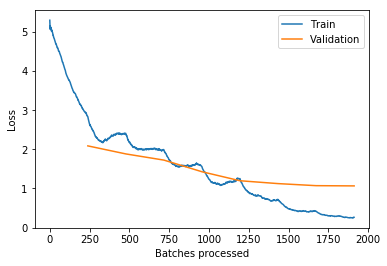

In [14]:
time = mlc.time.Timer()
image_size_trials((240,400))
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.846244,2.191519,0.556213,01:48
1,2.485044,2.101809,0.510355,01:40
2,2.114841,1.740775,0.439349,01:40
3,1.650803,1.525871,0.387574,01:42
4,1.263739,1.323377,0.340976,01:47
5,0.771650,1.170192,0.297337,01:43
6,0.443709,1.130206,0.279586,01:42
7,0.281487,1.122880,0.267751,01:41


Train Cycle 1
Time taken: 829.3498485088348


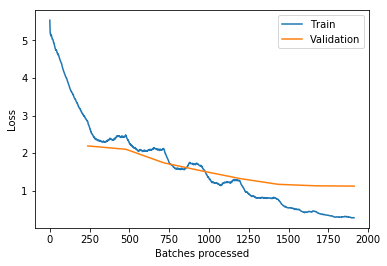

In [15]:
time = mlc.time.Timer()
image_size_trials((300,250))
print("Time taken: {}".format(time.since(0)))

### A few bigger squares:

epoch,train_loss,valid_loss,error_rate,time
0,2.760955,2.009553,0.495562,02:29
1,2.312632,1.913690,0.471893,02:23
2,1.896237,1.597379,0.399408,02:21
3,1.438333,1.312060,0.329142,02:21
4,1.053029,1.105974,0.290680,02:22
5,0.634000,0.999200,0.224852,02:21
6,0.338975,0.960528,0.221154,02:25
7,0.215426,0.942670,0.216716,02:22


Train Cycle 1
Time taken: 1151.339896440506


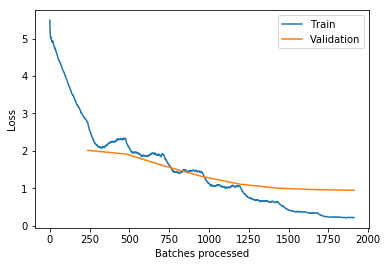

In [16]:
time = mlc.time.Timer()
image_size_trials((450,450))
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time
0,2.707845,1.952978,0.468195,02:52
1,2.315919,1.971301,0.472633,02:44
2,1.848216,1.457829,0.364645,02:45
3,1.432484,1.299963,0.337278,02:43
4,1.030991,1.155293,0.274408,02:45
5,0.588011,1.026446,0.247041,02:44
6,0.320369,0.944157,0.229290,02:44
7,0.217933,0.944721,0.219675,02:43


Train Cycle 1
Time taken: 1326.0765872001648


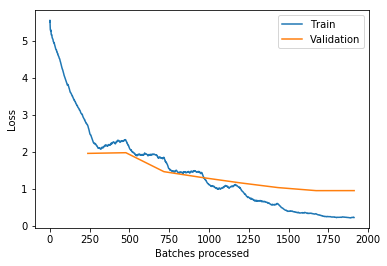

In [17]:
time = mlc.time.Timer()
image_size_trials((500,500))
print("Time taken: {}".format(time.since(0)))

In [18]:
time = mlc.time.Timer()
image_size_trials((550,550))
print("Time taken: {}".format(time.since(0)))

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 82.00 MiB (GPU 0; 15.90 GiB total capacity; 15.09 GiB already allocated; 17.88 MiB free; 132.98 MiB cached)